# 1. Dice rolls

In [44]:
import random as rnd

with open("../Data/dice_rolls.txt", 'w') as f_rolls:
    dice_rolls = [rnd.randint(1,6) for _ in range(20)]

    f_rolls.write("20 simulated dice rolls:\n")
    f_rolls.write(repr(dice_rolls) + "\n\n")

    f_rolls.write("20 simulated dice rolls, sorted:\n")
    dice_rolls.sort()
    f_rolls.write(repr(dice_rolls) + "\n\n")

    number_fours = len(list(filter(lambda i: i ==4, dice_rolls)))
    f_rolls.write("Number of fours: " + str(number_fours))


# 2. Test results

In [164]:
with open("../Data/test_result.txt", 'r') as f_results_read, \
    open("../Data/test_result.txt", 'a') as f_results_append:
    # print(f_results_read.read())

    # split into list of lines
    names = f_results_read.readlines()
    # append \n to last line to make all lines the same
    names[-1] += "\n"
    # sort lines alphabetically
    names.sort()
    # append
    f_results_append.write("\n\nNames sorted alphabetically\n\n")
    for name in names:
        f_results_append.write(name)

    # make lists for sorting grades
    grades = [["A"], ["B"], ["C"], ["D"], ["E"], ["F"]]

    # sort into grades
    for name in names:
        name = name.strip()
        grade = int(name[-2:])

        if 60 <= grade <= 70:
            grades[0].append(name)
        elif 50 <= grade <= 59:
            grades[1].append(name)
        elif 40 <= grade <= 49:
            grades[2].append(name)
        elif 30 <= grade <= 39:
            grades[3].append(name)
        elif 20 <= grade <= 29:
            grades[4].append(name)
        elif grade < 20:
            grades[5].append(name)
        else:
            print(f"{name} ?????")

    # append names ordered by grades
    f_results_append.write("\nNames sorted by grade\n")
    for grade in grades:
        f_results_append.write("\nGrade: " + grade[0] + "\n")
        for name in grade[1:]:
            f_results_append.write(name + "\n")
        


# 3. National test

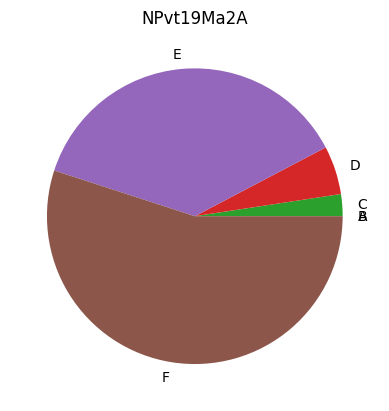

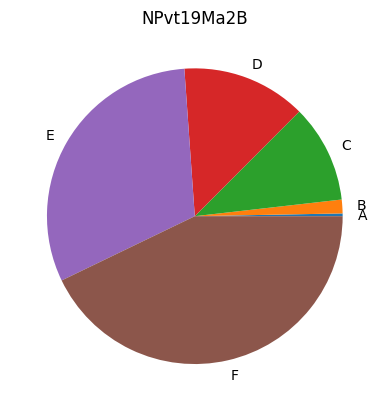

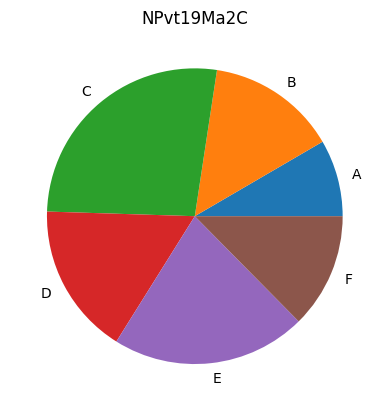

In [226]:
import matplotlib.pylab as plt

with open("../Data/NPvt19Ma2A.txt", 'r') as f_a, \
    open("../Data/NPvt19Ma2B.txt", 'r') as f_b, \
    open("../Data/NPvt19Ma2C.txt", 'r') as f_c:

    files = [f_a, f_b, f_c]
    
    classes = [["NPvt19Ma2A"], ["NPvt19Ma2B"], ["NPvt19Ma2C"]]

    for i in range(len(files)):
        for grade in files[i].readlines():
            grade = grade.strip().replace("%", "")
            classes[i].append(grade[2:])    
    
label = ["A", "B", "C", "D", "E", "F"]
classes
for cl in classes:
    cl_grades = [float(i) for i in cl[1:]]
    # new plot with index 0-2
    plt.figure(classes.index(cl))
    plt.pie(cl_grades, labels=label)
    plt.title(cl[0])
    # print(cl_grades)

# 4. Dice roll experiment

In [262]:
import random as rnd

with open("../Data/simulation.txt", 'w') as f_simulation:
    dice_rolls = []
    for i in range(1,6):
        rolls = [rnd.randint(1,6) for _ in range(10**i)]
        f_simulation.write(f"Number of rolls: {10**i}\n")
        
        num_print = ['Ones', 'Twos', 'Threes', 'Fours', 'Fives', 'Sixes']
        for j in range(1,7):
            filtered_rolls = filter(lambda k: k == j, rolls)
            num_rolls = len(list(filtered_rolls))
            prob_rolls = num_rolls/len(rolls)
            f_simulation.write(f"{num_print[j-1]}: {num_rolls}" + \
            f", probability {prob_rolls}\n")
        f_simulation.write("\n")
